# Exploratory Data Analysis of 2017 and 2021 together (JORN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

#### OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class

- CH - Canopy Height (meters)
- ARVI - atmospherically resistant vegetation index
- EVI - enhanced vegetation index
- NDVI - normalized difference vegetation index
- SAVI - soil-adjusted vegetation index
- Veg_class - vegetation classification

In [2]:
#adding datatables together
df = pd.concat(map(pd.read_csv, ['JORN17_dataset_v2.csv', 'JORN21_dataset_v1.csv']), ignore_index=True)
df.dropna(axis=0,inplace=True)

## Heatmap of all Variables

<AxesSubplot:>

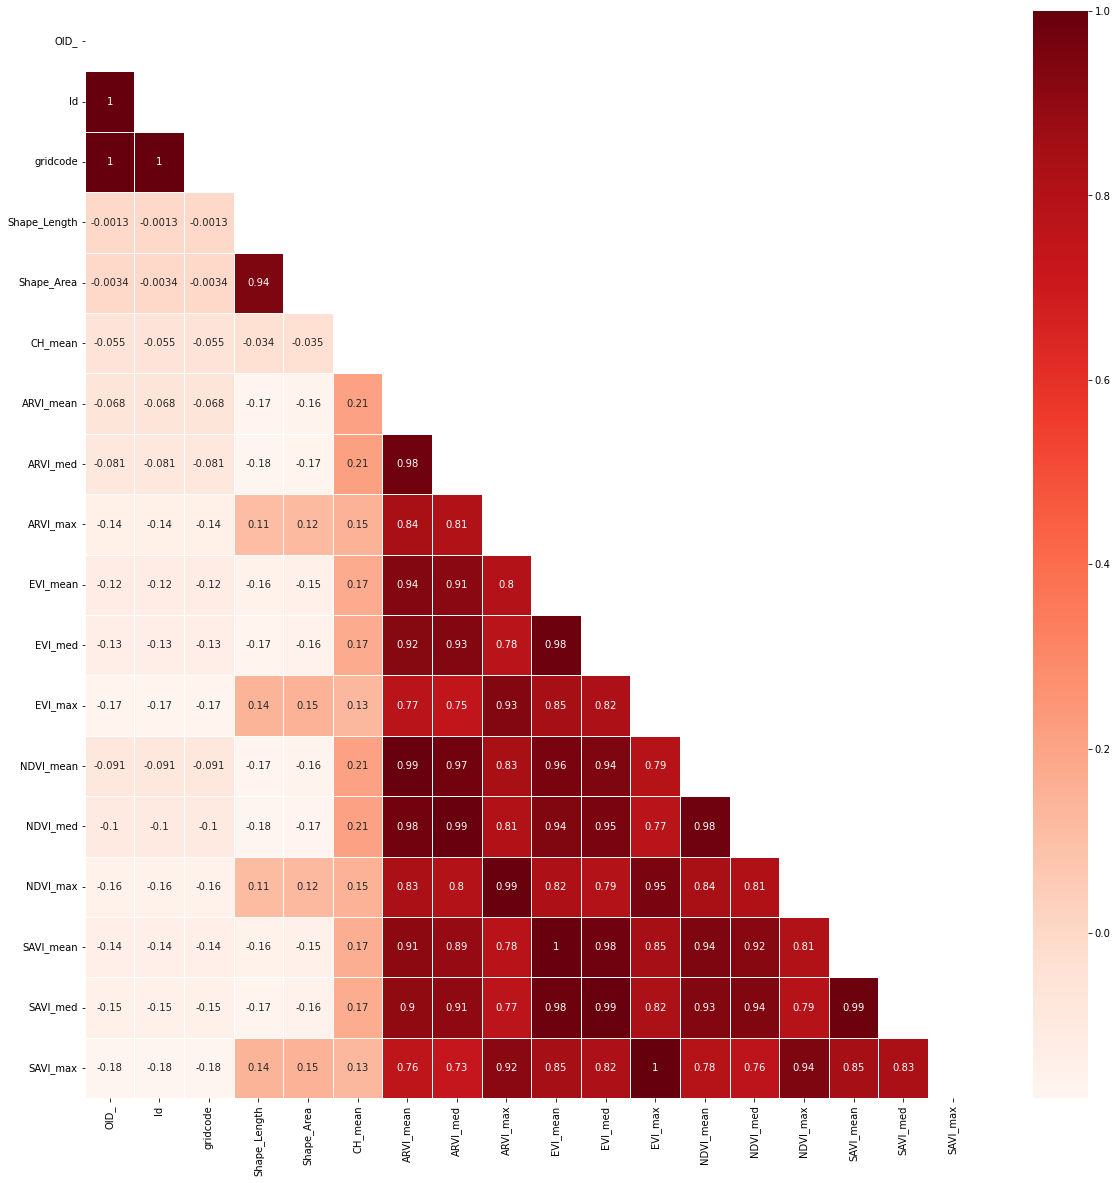

In [3]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95,as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap = "Reds", linewidths=.5,mask=mask)

## Full code of all variables histogram with "line of best fit"

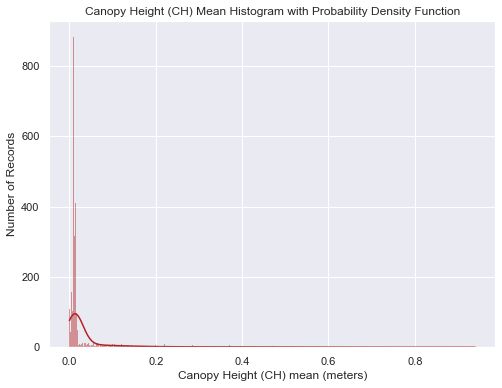

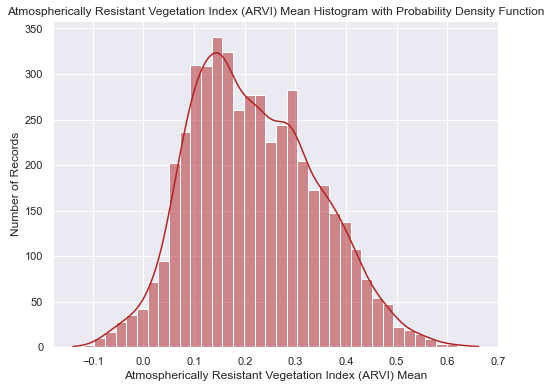

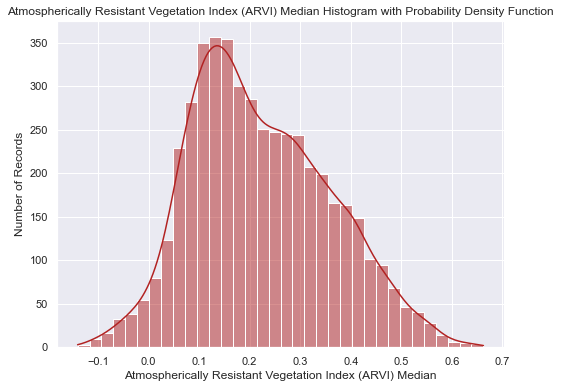

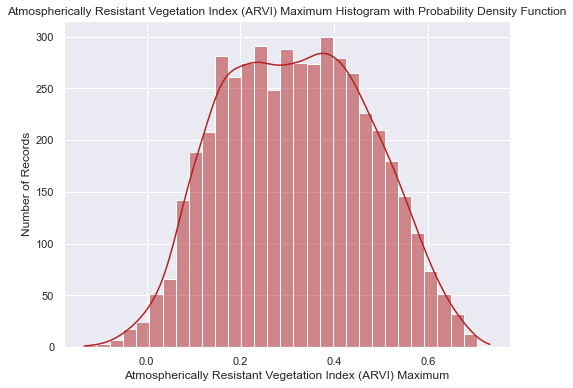

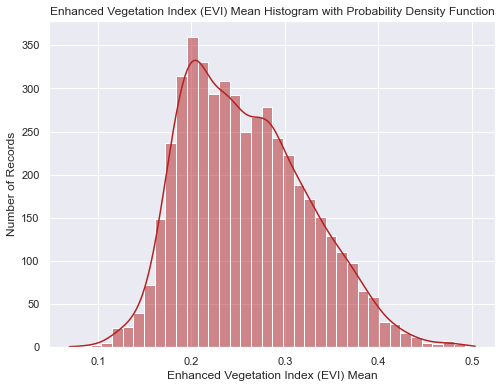

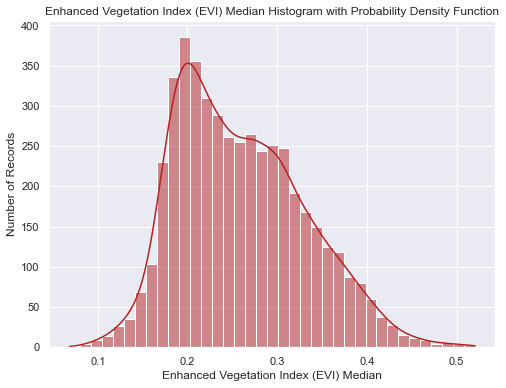

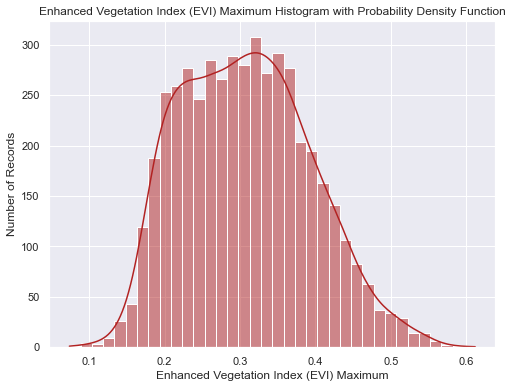

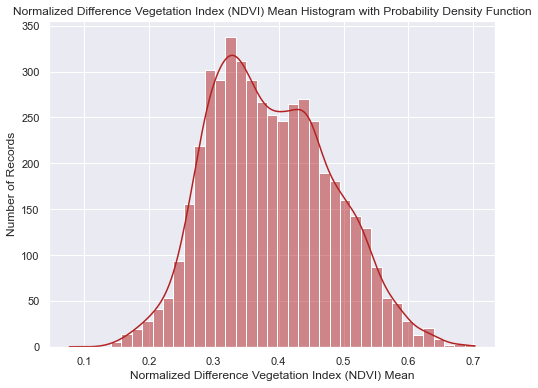

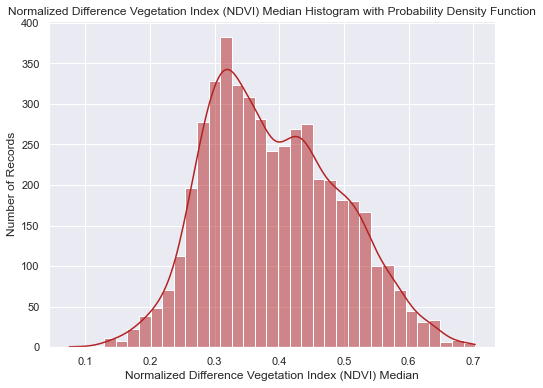

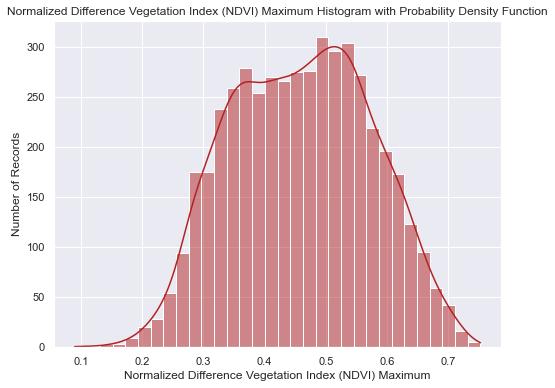

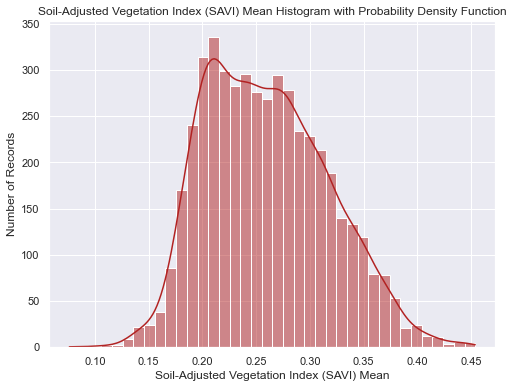

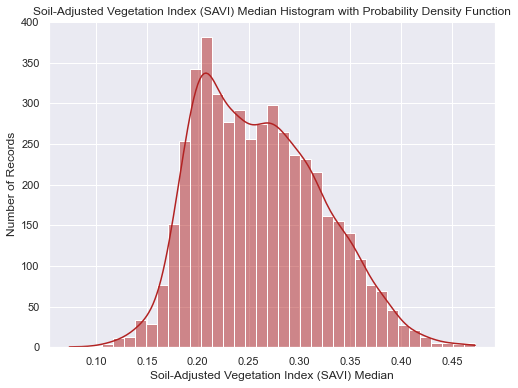

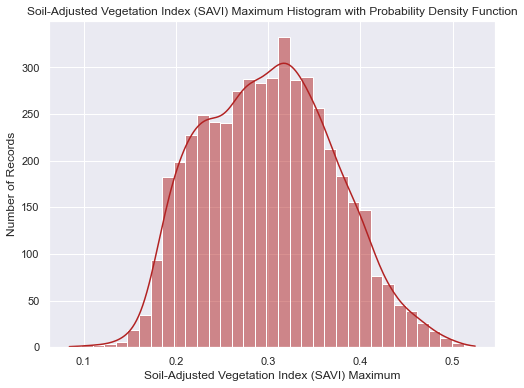

In [4]:
category = ["CH_mean","ARVI_mean","ARVI_med","ARVI_max","EVI_mean","EVI_med","EVI_max","NDVI_mean","NDVI_med","NDVI_max","SAVI_mean","SAVI_med","SAVI_max"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=df,color="firebrick",kde=True)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")

## Veg_class Piechart and Histogram

Text(0.5, 0, 'Vegetation Class')

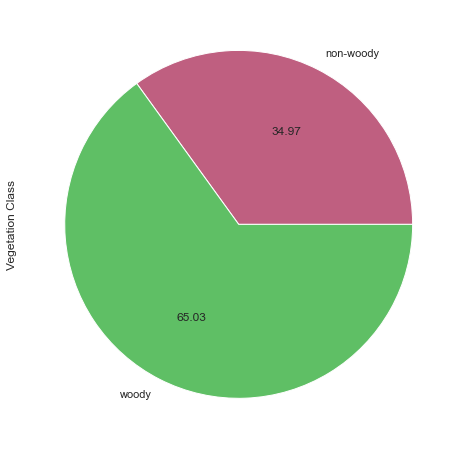

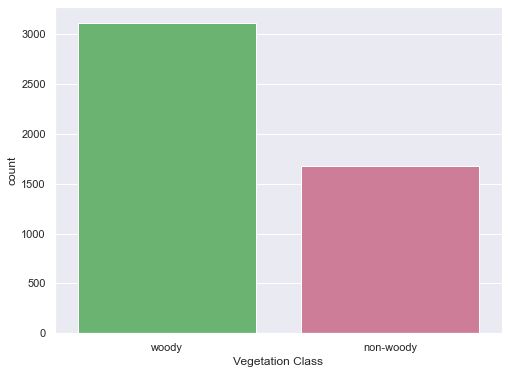

In [5]:
#pie
from matplotlib.pyplot import pie, axis, show
from cycler import cycler

my_colors = ["#bf5f80","#5fbf65"]
sns.set_palette(my_colors)
plt.figure()
plt.rc('axes')
df.groupby('Veg_class').size().plot(kind='pie', autopct='%.2f')
plt.ylabel("Vegetation Class")

#hist
my_colors = ("#5fbf65", "palevioletred")
sns.set_palette(my_colors)
plt.figure(figsize=(8,6))
sns.countplot(x=df["Veg_class"])
plt.xlabel("Vegetation Class")

## Means without Canopy Height Pairplot

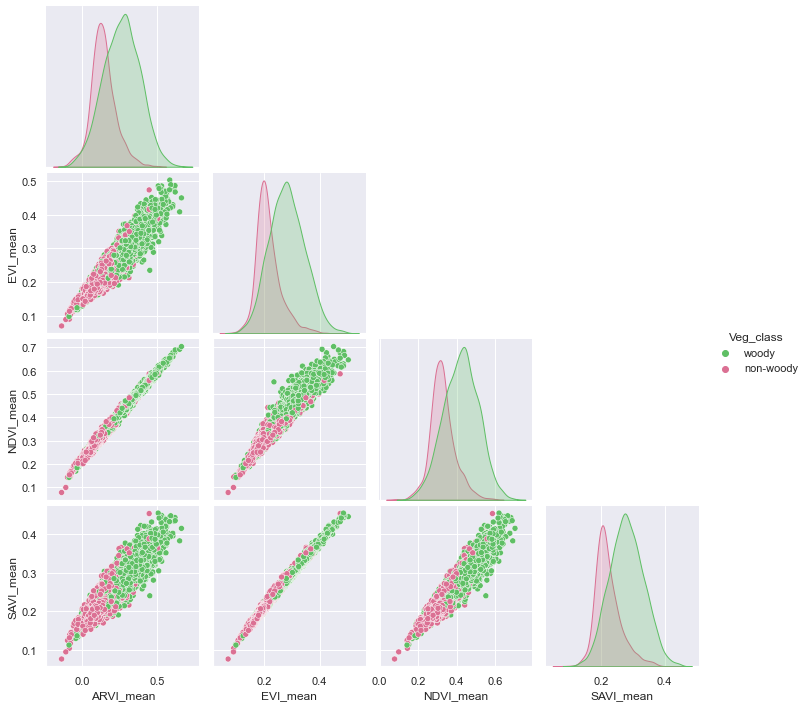

In [6]:
mewch = sns.pairplot(df, hue="Veg_class", x_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], corner = "True")

## Boxplot of all Records

<AxesSubplot:>

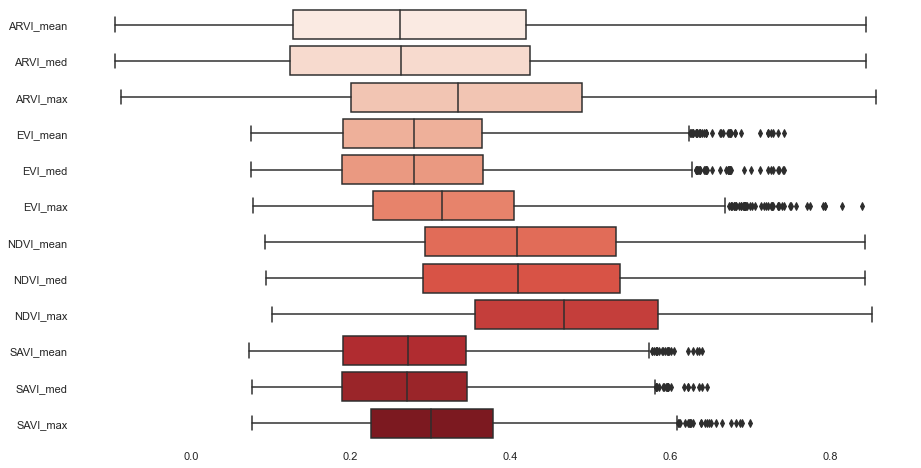

In [7]:
sampledatav3 = pd.concat(map(pd.read_csv, ['SRER21_dataset_v1.csv', 'SRER_2017_training_bi.csv']), ignore_index=True)
sampledatav3.isnull().sum()
sampledatav3.dropna(axis=0,inplace=True)
sampledatav3.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav3.drop(["a"], axis=1, inplace=True)
sampledatav3.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav3.drop(["b"], axis=1, inplace=True)
sampledatav3.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav3.drop(["c"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Length":"d"}, axis="columns", inplace=True)
sampledatav3.drop(["d"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Area":"e"}, axis="columns", inplace=True)
sampledatav3.drop(["e"], axis=1, inplace=True)
sampledatav3.rename({"CH_mean":"f"}, axis="columns", inplace=True)
sampledatav3.drop(["f"], axis=1, inplace=True)

white: plt.rcParams.update({'axes.facecolor':'white'})
nongrid: plt.grid(b=None)
sns.boxplot(data=sampledatav3, orient="h", palette = "Reds")